In [18]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du

i=1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)
Fz0 = 3114
IA = 0

iter = 1000 #
Fz = np.linspace(1500,5000,iter)


Text(0.5, 1.0, 'Fx_max vs. Fz')

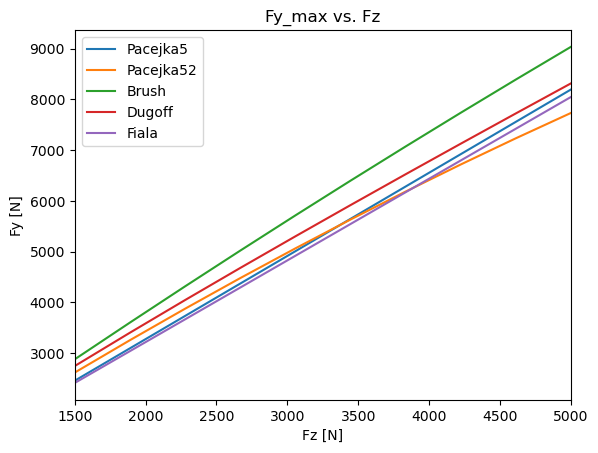

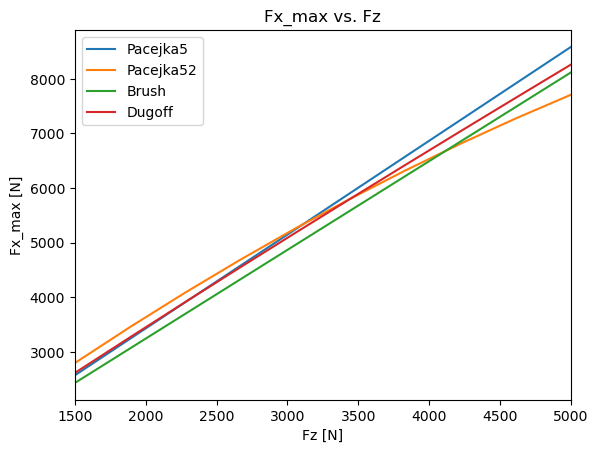

In [16]:
#Fz-Fy  , Fz -Fy


j = 0
plt.figure(1)
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka5_lat(Sy,Fz[j])
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka5")

j = 0
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka52")

mu_lat = 1.96838261e+00
Ca_lat = 9.71111628e+04
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = br.brush_lat(Sy, Fz[j], mu_lat, Ca_lat)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Brush")

Cs = 2.74289218e-01
Ca = 6.16477615e+03
mu = 1.43548745e-01
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Dugoff")

C_lat = -1.26902260e+05
mu1 = -2.32752807e+00
mu2 = -1.44561563e+00
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Fiala")

plt.xlabel("Fz [N]")
plt.ylabel("Fy [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fy_max vs. Fz")
#Fx vs. Fz

j = 0
plt.figure(2)
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka5_long(Sx,Fz[j])
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka5")

j = 0
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0]
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka52")


mu_long  = 1.62344260e+00
kt_long  = 3.63683914e+06
lam_long = 3.10083340e-02
j=0
Fx_max = np.zeros(len(Fz))
Sx_br = np.linspace(0,1,iter)
for j in range(len(Fz)):
    Fx = br.brush_long(Sx_br,Fz[j],mu_long,kt_long,lam_long)
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Brush")

Cs = 1.54528498e+05
Ca = -1.96810483e+01
mu = 1.25090001e+00
j=0
Fx_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Dugoff")


plt.xlabel("Fz [N]")
plt.ylabel("Fx_max [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fx_max vs. Fz")



(0.1, 0.15)

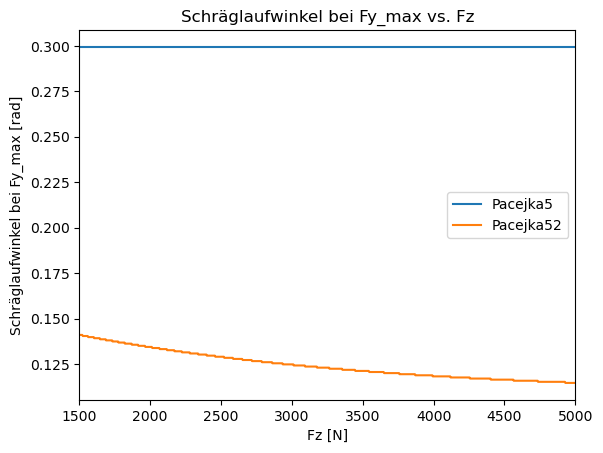

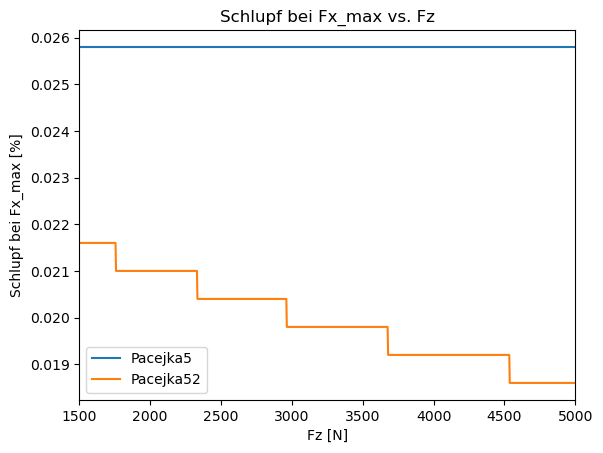

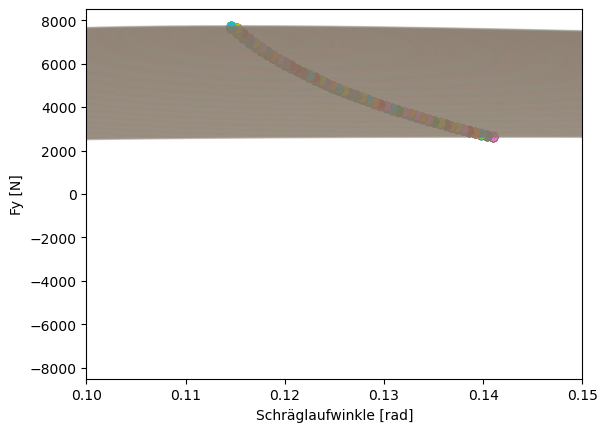

In [19]:
j = 0
plt.figure(1)
Fy_max_slip5 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka5_lat(Sy,Fz[j])
    Fy_max_slip5[j] = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fy_max_slip5, label = "Pacejka5")

j = 0
Fy_max_slip52 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    Fy_max_slip52[j] = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fy_max_slip52, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Schräglaufwinkel bei Fy_max [rad]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Schräglaufwinkel bei Fy_max vs. Fz")

#Fx

j = 0
plt.figure(2)
Fx_max_slip5 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka5_long(Sx,Fz[j])
    Fx_max_slip5[j] = (np.argmax(Fx)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fx_max_slip5, label = "Pacejka5")

j = 0
Fx_max_slip52 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0]
    Fx_max_slip52[j] = (np.argmax(Fx)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fx_max_slip52, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Schlupf bei Fx_max [%]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Schlupf bei Fx_max vs. Fz")

plt.figure(3)
j=0
for j in range(0, len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    plt.plot(Sy,Fy, alpha = 0.1)
    max = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
    y=np.max(Fy)
    plt.scatter(max,y)

plt.xlabel("Schräglaufwinkle [rad]")
plt.ylabel("Fy [N]")
plt.xlim(0.1,0.15)


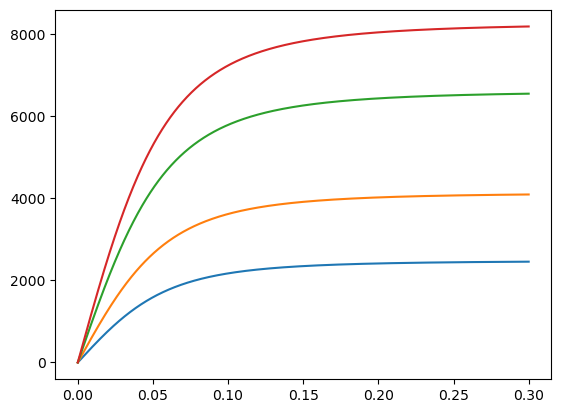

In [21]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
plt.figure(1)
for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(alpha,Fz,B,C,D,E)
    plt.plot(Sy,Fy)


